Test on banking77 data with pretrain model



In [ ]:
import torch
import torchvision
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from torch.utils.data import DataLoader, Dataset
from tqdm import tqdm
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving banking77_5000nonhate+2231hate.csv to banking77_5000nonhate+2231hate.csv


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

Using device: cuda


In [ ]:
# using HateBERT_ToxiGen
tokenizer = AutoTokenizer.from_pretrained("tomh/toxigen_hatebert")

tokenizer.add_special_tokens({'pad_token': '[PAD]'})

model = AutoModelForSequenceClassification.from_pretrained("tomh/toxigen_hatebert", ignore_mismatched_sizes=True)

model.resize_token_embeddings(len(tokenizer))

model.to(device)

data = pd.read_csv("banking77_5000nonhate+2231hate.csv")
data = data.dropna(subset=['text', 'label'])
data['text'] = data['text'].astype(str)

# Define dataset
class TextDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=128):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        inputs = self.tokenizer(
            text,
            max_length=self.max_length,
            padding="max_length",
            truncation=True,
            return_tensors="pt"
        )
        return {
            "input_ids": inputs["input_ids"].squeeze(0),
            "attention_mask": inputs["attention_mask"].squeeze(0),
            "labels": torch.tensor(label, dtype=torch.long)
        }

# Creat DataLoader
val_dataset = TextDataset(data['text'].tolist(), data['label'].tolist(), tokenizer)
val_dataloader = DataLoader(val_dataset, batch_size=8)

model.eval()
val_losses = []
all_labels = []
all_preds = []

with torch.no_grad():
    for batch in tqdm(val_dataloader):
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["labels"].to(device)

        # forward
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits

        # Get loss
        loss = torch.nn.functional.cross_entropy(logits, labels)
        val_losses.append(loss.item())

        # Get result
        preds = torch.argmax(logits, dim=1)
        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(preds.cpu().numpy())

average_loss = np.mean(val_losses)
accuracy = accuracy_score(all_labels, all_preds)
precision = precision_score(all_labels, all_preds)
recall = recall_score(all_labels, all_preds)
f1 = f1_score(all_labels, all_preds)

# print
print(f"Validation Loss: {average_loss:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/236 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/90.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/727 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

The new embeddings will be initialized from a multivariate normal distribution that has old embeddings' mean and covariance. As described in this article: https://nlp.stanford.edu/~johnhew/vocab-expansion.html. To disable this, use `mean_resizing=False`


model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]


100%|██████████| 904/904 [00:15<00:00, 57.82it/s]

Validation Loss: 1.4936
Accuracy: 0.5218
Precision: 0.2272
Recall: 0.2290
F1 Score: 0.2281


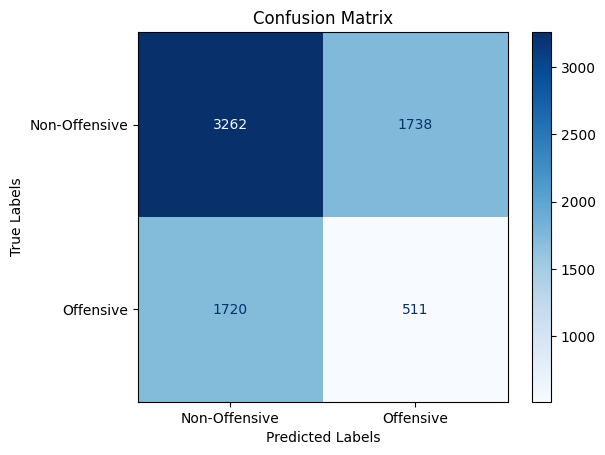

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix
cm = confusion_matrix(all_labels, all_preds)
class_names = ["Non-Offensive", "Offensive"]

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)

# Add titles and labels
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

Test on Preprocessed Finance Chatbox data with pretrain model

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving banking77_5000nonhate+2231hate.csv to banking77_5000nonhate+2231hate (1).csv
Saving banking_conversation_5000nonhate+2232hate.csv to banking_conversation_5000nonhate+2232hate.csv


In [ ]:
# using HateBERT_ToxiGen
tokenizer = AutoTokenizer.from_pretrained("tomh/toxigen_hatebert")

tokenizer.add_special_tokens({'pad_token': '[PAD]'})

model = AutoModelForSequenceClassification.from_pretrained("tomh/toxigen_hatebert", ignore_mismatched_sizes=True)

model.resize_token_embeddings(len(tokenizer))

model.to(device)

data = pd.read_csv("banking_conversation_5000nonhate+2232hate.csv")
data = data.dropna(subset=['text', 'label'])
data['text'] = data['text'].astype(str)

# Define dataset
class TextDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=128):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        inputs = self.tokenizer(
            text,
            max_length=self.max_length,
            padding="max_length",
            truncation=True,
            return_tensors="pt"
        )
        return {
            "input_ids": inputs["input_ids"].squeeze(0),
            "attention_mask": inputs["attention_mask"].squeeze(0),
            "labels": torch.tensor(label, dtype=torch.long)
        }

# Creat DataLoader
val_dataset = TextDataset(data['text'].tolist(), data['label'].tolist(), tokenizer)
val_dataloader = DataLoader(val_dataset, batch_size=8)

model.eval()
val_losses = []
all_labels = []
all_preds = []

with torch.no_grad():
    for batch in tqdm(val_dataloader):
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["labels"].to(device)

        # forward
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits

        # Get loss
        loss = torch.nn.functional.cross_entropy(logits, labels)
        val_losses.append(loss.item())

        # Get result
        preds = torch.argmax(logits, dim=1)
        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(preds.cpu().numpy())

average_loss = np.mean(val_losses)
accuracy = accuracy_score(all_labels, all_preds)
precision = precision_score(all_labels, all_preds)
recall = recall_score(all_labels, all_preds)
f1 = f1_score(all_labels, all_preds)

# print
print(f"Validation Loss: {average_loss:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

100%|██████████| 904/904 [00:14<00:00, 60.79it/s]

Validation Loss: 1.3744
Accuracy: 0.5118
Precision: 0.2261
Recall: 0.2401
F1 Score: 0.2329


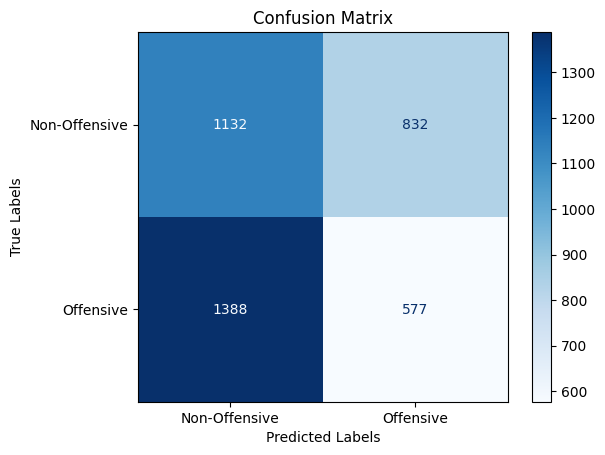

In [ ]:

# Compute confusion matrix
cm = confusion_matrix(all_labels, all_preds)
class_names = ["Non-Offensive", "Offensive"]

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)

# Add titles and labels
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

Finetune with Chatbox Data test on SocialMedia_data

In [ ]:
import torch
import torchvision
from transformers import AdamW, get_scheduler
from torch.utils.data import DataLoader, Dataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from tqdm import tqdm
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np


In [ ]:

tokenizer = AutoTokenizer.from_pretrained("tomh/toxigen_hatebert")

tokenizer.add_special_tokens({'pad_token': '[PAD]'})

model = AutoModelForSequenceClassification.from_pretrained("tomh/toxigen_hatebert", ignore_mismatched_sizes=True)

model.resize_token_embeddings(len(tokenizer))


model.to(device)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(50258, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving banking_valid.csv to banking_valid.csv
Saving banking_train.csv to banking_train.csv
Saving banking_test.csv to banking_test.csv


In [ ]:
# 加载训练数据
train_data = pd.read_csv("banking_train.csv")
train_data = train_data.dropna(subset=['text', 'label'])
train_data['text'] = train_data['text'].astype(str)

# 加载验证数据
val_data = pd.read_csv("banking_valid.csv")
val_data = val_data.dropna(subset=['text', 'label'])
val_data['text'] = val_data['text'].astype(str)

# 加载测试数据
test_data = pd.read_csv("banking_test.csv")
test_data = test_data.dropna(subset=['text', 'label'])
test_data['text'] = test_data['text'].astype(str)

# 提取文本和标签
train_texts = train_data["text"].tolist()
train_labels = train_data["label"].tolist()

val_texts = val_data["text"].tolist()
val_labels = val_data["label"].tolist()

test_texts = test_data["text"].tolist()
test_labels = test_data["label"].tolist()

In [ ]:
# Define class fo dataset
class TextDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=128):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        inputs = self.tokenizer(
            text,
            max_length=self.max_length,
            padding="max_length",
            truncation=True,
            return_tensors="pt"
        )
        return {
            "input_ids": inputs["input_ids"].squeeze(0),
            "attention_mask": inputs["attention_mask"].squeeze(0),
            "labels": torch.tensor(label, dtype=torch.long)
        }

# Creat DataLoader
train_dataset = TextDataset(train_texts, train_labels, tokenizer)
val_dataset = TextDataset(val_texts, val_labels, tokenizer)
test_dataset = TextDataset(test_texts, test_labels, tokenizer)

train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=32)
test_dataloader = DataLoader(test_dataset, batch_size=32)

In [ ]:
optimizer = AdamW(model.parameters(), lr=2e-5)
num_epochs = 3
num_training_steps = num_epochs * len(train_dataloader)
lr_scheduler = get_scheduler(
    "linear",
    optimizer=optimizer,
    num_warmup_steps=0,
    num_training_steps=num_training_steps
)

/usr/local/lib/python3.11/dist-packages/transformers/optimization.py:640: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
# Training the model
model.train()  # Set the model to training mode
for epoch in range(num_epochs):
    print(f"Epoch {epoch + 1}/{num_epochs}")
    epoch_loss = 0

    for batch in tqdm(train_dataloader):
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["labels"].to(device)

        # Forward pass: compute the model outputs and loss
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        epoch_loss += loss.item()

        # Backward pass: compute gradients
        optimizer.zero_grad()
        loss.backward()

        optimizer.step()
        lr_scheduler.step()

    # Calculate and display the average training loss for the epoch
    avg_loss = epoch_loss / len(train_dataloader)
    print(f"Training Loss: {avg_loss:.4f}")

Epoch 1/3


100%|██████████| 181/181 [00:28<00:00,  6.24it/s]


Training Loss: 0.1197
Epoch 2/3


100%|██████████| 181/181 [00:28<00:00,  6.39it/s]


Training Loss: 0.0054
Epoch 3/3


100%|██████████| 181/181 [00:28<00:00,  6.37it/s]

Training Loss: 0.0046


In [ ]:
print("\nEvaluating on test data...")
model.eval()

test_losses = []
test_labels_all = []
test_preds_all = []

with torch.no_grad():
    for batch in tqdm(test_dataloader):
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["labels"].to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits

        loss = torch.nn.functional.cross_entropy(logits, labels)
        test_losses.append(loss.item())

        preds = torch.argmax(logits, dim=1)
        test_labels_all.extend(labels.cpu().numpy())
        test_preds_all.extend(preds.cpu().numpy())

average_loss = np.mean(test_losses)
accuracy = accuracy_score(test_labels_all, test_preds_all)
precision = precision_score(test_labels_all, test_preds_all)
recall = recall_score(test_labels_all, test_preds_all)
f1 = f1_score(test_labels_all, test_preds_all)

print(f"Test Loss: {average_loss:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")




Evaluating on test data...


100%|██████████| 23/23 [00:01<00:00, 18.34it/s]

Test Loss: 0.0038
Accuracy: 0.9986
Precision: 0.9953
Recall: 1.0000
F1 Score: 0.9976


In [ ]:
print(f"Training set size: {len(train_texts)}")
print(f"Validation set size: {len(val_texts)}")
print(f"Test set size: {len(test_texts)}")

Training set size: 2357
Validation set size: 786
Test set size: 786
